# Telecom Churn Data Prediction

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [20]:
df_churn=pd.read_csv("Churn_Telecom.csv", sep=",")
df_churn

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [22]:
le=LabelEncoder()
list1=['state','voice mail plan','churn']
for val in list1:
    df_churn[val]=le.fit_transform(df_churn[val].astype(str))

In [23]:
df_churn.drop(['account length'],axis=1,inplace=True)

In [24]:
df_churn.drop(['phone number'],axis=1,inplace=True)
df_churn.drop(['total day minutes'],axis=1,inplace=True)
df_churn.drop(['total night minutes'],axis=1,inplace=True)
df_churn.drop(['total intl minutes'],axis=1,inplace=True)

In [25]:
list1=['international plan']
for val in list1:
    df_churn[val]=le.fit_transform(df_churn[val].astype(str))

In [26]:
df_churn['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

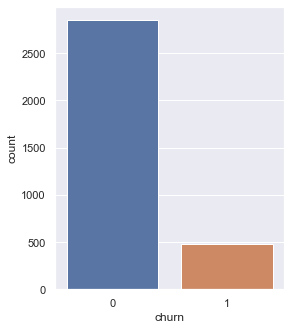

In [27]:
#Compariing the churn counts(yes/No)(1/0)
sns.set(rc={'figure.figsize':(4.1,5.2)})
sns.countplot(df_churn['churn'])

In [28]:
#area code 415 has max counts of (1) customer service calls
pd.crosstab(df_churn['area code'],df_churn['customer service calls'])

customer service calls,0,1,2,3,4,5,6,7,8,9
area code,,,,,,,,,,
408,166,328,195,84,41,13,6,3,1,1
415,358,577,373,215,80,36,10,5,0,1
510,173,276,191,130,45,17,6,1,1,0


In [29]:
df=pd.DataFrame()
df['service_calls']=df_churn['customer service calls']
df['churn']=df_churn['churn']
df 

,service_calls,churn
0,1,0
1,1,0
2,0,0
3,2,0
4,3,0
...,...,...
3328,2,0
3329,3,0
3330,2,0
3331,2,0


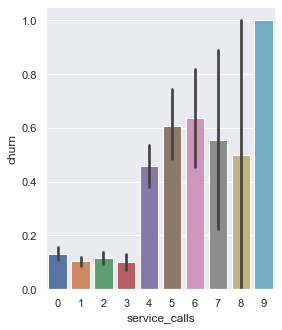

In [30]:
sns.barplot(x='service_calls',y='churn',data=df)
plt.show()

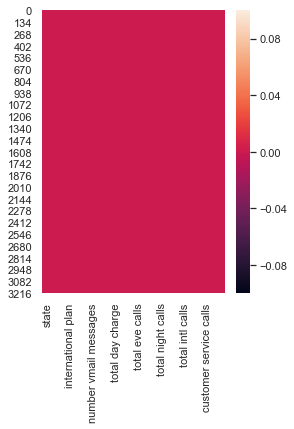

In [31]:
sns.heatmap(df_churn.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000056D2922C08>,
      dtype=object)

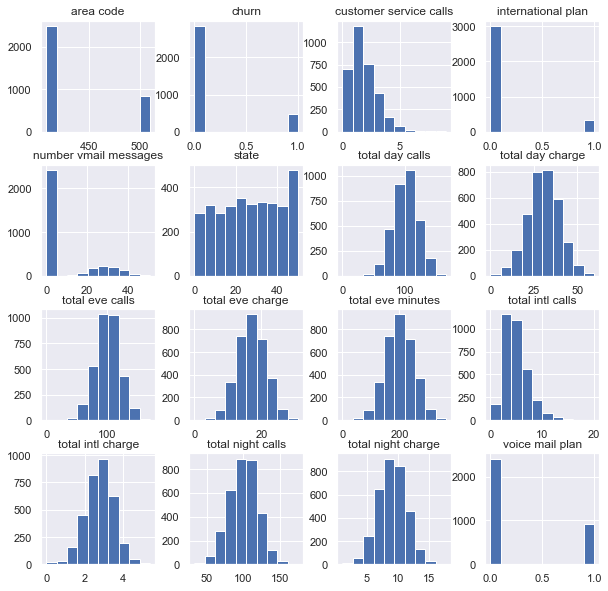

In [32]:
df_churn.hist(figsize=(10,10))

In [33]:
df_churn.skew()

state                    -0.064618
area code                 1.126823
international plan        2.726332
voice mail plan           0.999140
number vmail messages     1.264824
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night calls         0.032500
total night charge        0.008886
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [34]:
import numpy as np
for col in df_churn.columns:
    if df_churn.skew().loc[col]>0.55:
        df_churn[col]=np.sqrt(df_churn[col])

In [36]:
df_churn.describe()

,state,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,20.885555,0.096910,0.276628,1.483293,100.435644,30.562307,200.980348,100.114311,17.083540,100.107711,9.039325,2.038268,2.764581,1.070020,0.144914
std,14.824911,0.988084,0.295879,0.447398,2.429120,20.069084,9.259435,50.713844,19.922625,4.310668,19.568609,2.275873,0.570097,0.753773,0.646560,0.352067
min,0.000000,20.199010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,20.199010,0.000000,0.000000,0.000000,87.000000,24.430000,166.600000,87.000000,14.160000,87.000000,7.520000,1.732051,2.300000,1.000000,0.000000
50%,26.000000,20.371549,0.000000,0.000000,0.000000,101.000000,30.500000,201.400000,100.000000,17.120000,100.000000,9.050000,2.000000,2.780000,1.000000,0.000000
75%,39.000000,22.583180,0.000000,1.000000,4.472136,114.000000,36.790000,235.300000,114.000000,20.000000,113.000000,10.590000,2.449490,3.270000,1.414214,0.000000
max,50.000000,22.583180,1.000000,1.000000,7.141428,165.000000,59.640000,363.700000,170.000000,30.910000,175.000000,17.770000,4.472136,5.400000,3.000000,1.000000


In [37]:
from scipy.stats import zscore
z_score=abs(zscore(df_churn))
print(df_churn.shape)
df_churn_final=df_churn.loc[(z_score<3).all(axis=1)]
print(df_churn_final.shape)

(3333, 16)
(2934, 16)


In [38]:
import numpy as np
df_x=df_churn_final.drop(columns=["churn"])
y=df_churn_final[["churn"]]

In [39]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

max r2 score corresponding to  55  is  0.13749111536682812


In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=55,stratify=y)

In [42]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2053, 15) (881, 15)
(2053, 1) (881, 1)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [45]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=75)
GNB=GaussianNB()

In [46]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

******************** KNeighborsClassifier ********************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.9001135073779796


Cross_val_score =  0.8987743544720364


roc_auc_score =  0.5686659050520437


classification_report
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       780
         1.0       0.93      0.14      0.24       101

    accuracy                           0.90       881
   macro avg       0.92      0.57      0.59       881
weighted avg       0.90      0.90      0.87       881



[[779   1]
 [ 87  14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************** SVC ********************


SVC()


Accuracy_score =  0.9194097616345063


Cross_val_score =  0.9267217470681605


roc_auc_score =  0.6528243208936279


classification_report
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       780
         1.0       0.97      0.31      0.47       10

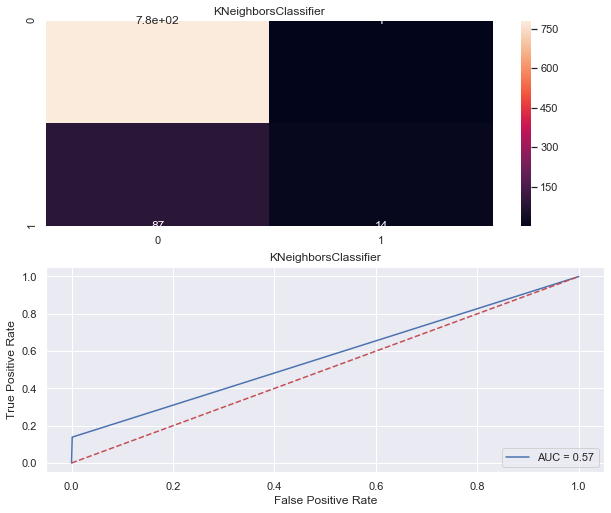

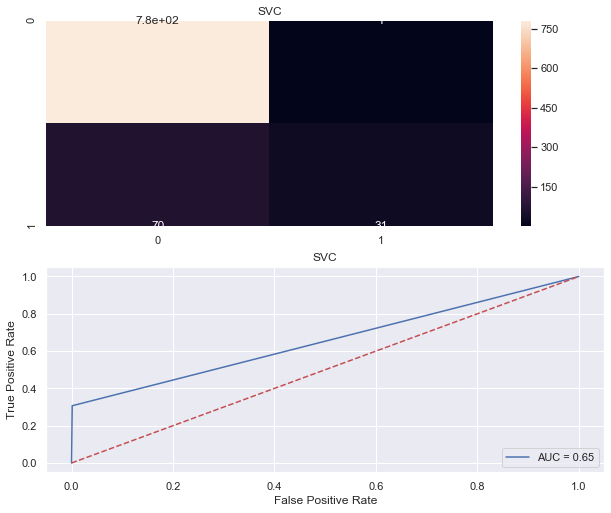

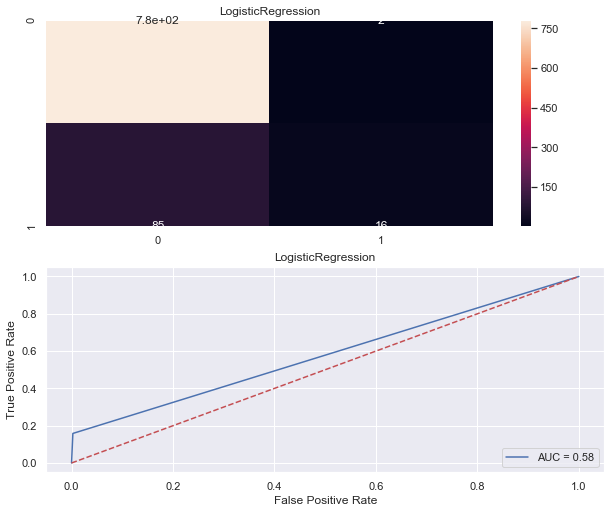

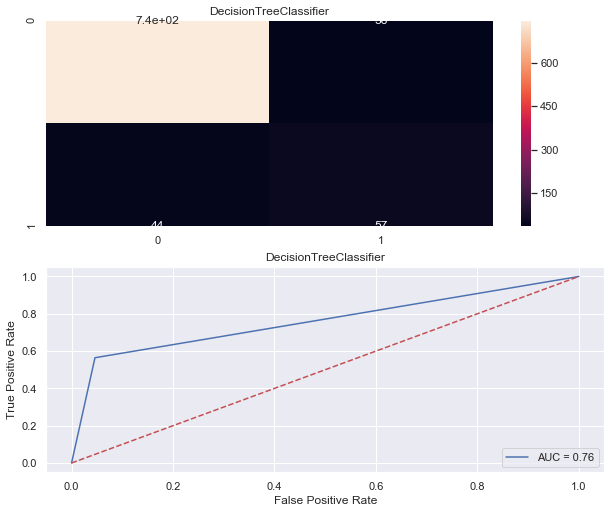

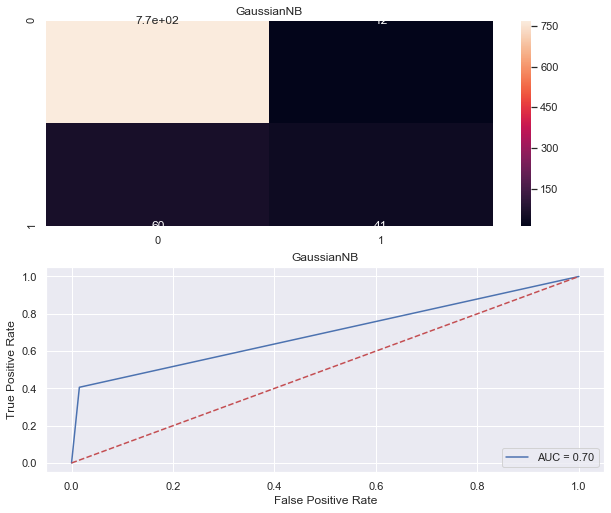

In [48]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('********************',name,'********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=5, scoring='accuracy').mean()
    print('Cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [49]:
Result = pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs, 'ROC_auc_curve':rocscore})

In [50]:
Result

,Model,Accuracy_score,Cross_val_score,ROC_auc_curve
0,KNeighborsClassifier,90.011351,89.877435,56.866591
1,SVC,91.940976,92.672175,65.282432
2,LogisticRegression,90.124858,89.741207,57.792587
3,DecisionTreeClassifier,90.919410,91.478915,75.910129
4,GaussianNB,91.827469,91.513393,69.527799


# Accuracy score of SVC is highest. So SVC is the final model.

In [51]:
#Saving the SVC classification model
from joblib import dump, load
dump(SV, 'Telecom_churn.joblib')

['Telecom_churn.joblib']